In [6]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import os

In [7]:
def border():
    bwith = 2 #边框宽度设置为2
    ax = plt.gca()#获取边框
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    ax.tick_params(axis="x", direction="in", length=16, width=5, color="k")
    # ax.spines['top'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['right'].set_color('grey')  # 设置右‘脊梁’为无色
    # ax.spines['left'].set_color('grey')  # 设置上‘脊梁’为红色
    # ax.spines['bottom'].set_color('none')  # 设置右‘脊梁’为无色
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)
    
ft = 60 # font size
lw = 8 # line width
marker = ["o", "v", "s", "^", "D", "o"]
# linestyle = ["-", ":", "--", "-.",('loosely dotted', (0, (1, 10)))]
color = ['darkred','darkblue','darkgreen','darkorange','darkviolet']
linestyle = [(0, ()), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4))]

type = ["FedCLS", "FedFSL", "FedFSL-BIAS", "Ours"]

In [12]:
root_path = "../../data/overall-performance/final"
output_fig_path = '../../figs/overall'
# roberta-large
filenames_list = {
    "agnews": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "mnli": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "yahoo": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
    "yelp-full": ["fedcls.log", 
    "ours.log",
    "ours+.log", "ours++.log",
    ],
}

# per batch latency, bs = 4, msl = 256
train_latency_list = {"tx2+bitfit": 1, "tx2+full": 2}
infer_latency_list = {"tx2+bitfit": 0.5, "tx2+full": 1}
communication_latency_list = {"bitfit": 1000 * 2 / 1000 / 1, "full": 1000 * 2 / 1}


In [13]:
datasets = {"agnews": 1,"mnli": 0, "yahoo": 5, "yelp-full": 0} # "agnews": 1, "mnli": 0, "yahoo": 5, "yelp-full": 0
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 0.001, "yelp-full": 0.001, "mnli": 100}
seed = 99
# plot hyper-para.
colors=['r','g','b','y','c','m','k'] * 100
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

inference time ratio: 0.0
inference energy ratio: 0.0
499 498
inference time ratio: 0.35094211245665446
inference energy ratio: 0.579030812711105
99 98
inference time ratio: 0.8547579298831386
inference energy ratio: 0.8564100657919191
65

/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


 65
inference time ratio: 0.35040024165533906
inference energy ratio: 0.35317399908661895
117 116
inference time ratio: 0.0
inference energy ratio: 0.0


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6


191 190
inference time ratio: 0.16165282810392734
inference energy ratio: 0.357738915724748


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


253 253
inference time ratio: 0.6594423338426815
inference energy ratio: 0.6624263618654211


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


241 241
inference time ratio: 0.06162295480864408
inference energy ratio: 0.06188153327934643


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


246 246
inference time ratio: 0.0
inference energy ratio: 0.0
52 51
inference time ratio: 0.38433054980975
inference energy ratio: 0.6144779999183418
44 43
inference time ratio: 0.8739076154806492
inference energy ratio: 0.8754187960289644


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/

28 27
inference time ratio: 0.41528529052521373
inference energy ratio: 0.4186946578314666
35 35


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:125: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "borderpad" which is no longer supported as of 3.3 and will become an error in 3.6


inference time ratio: 0.0
inference energy ratio: 0.0
59 59
inference time ratio: 0.22356903954266194
inference energy ratio: 0.4253734711377894
30 29
inference time ratio: 0.7604006726621335
inference energy ratio: 0.7628548375265899
33 32
inference time ratio: 0.39526616147441296
inference energy ratio: 0.39592053476603983
53 52


/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/cdq/opt/anaconda3/envs/fednlp/lib/python3.7/site-packages/ipykernel_launcher.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

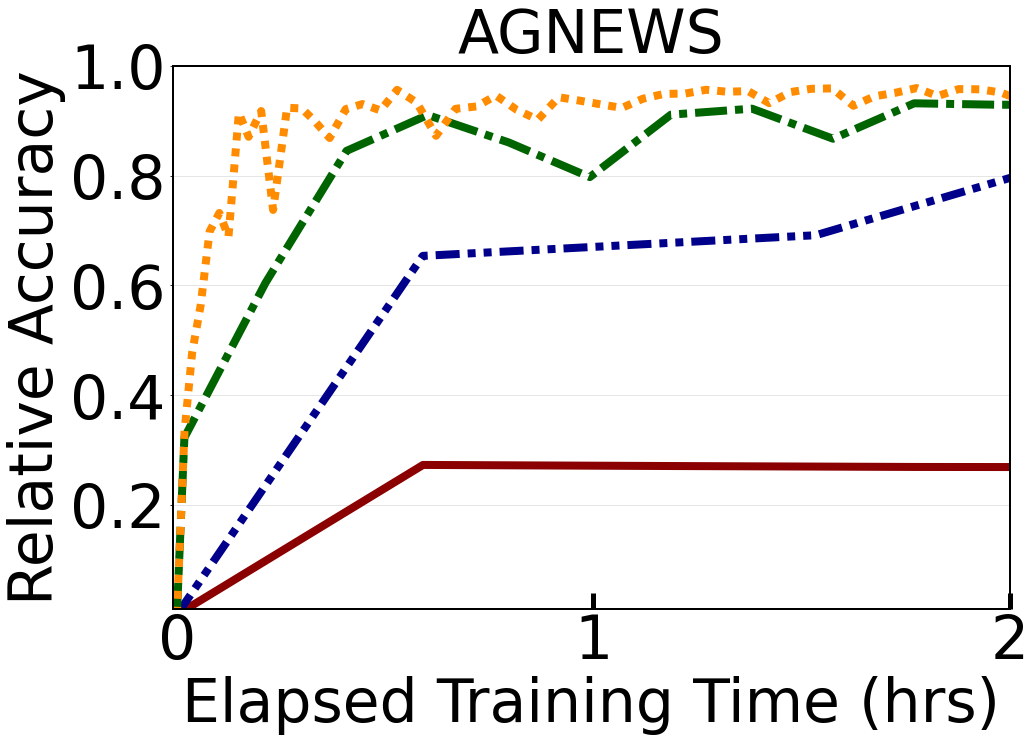

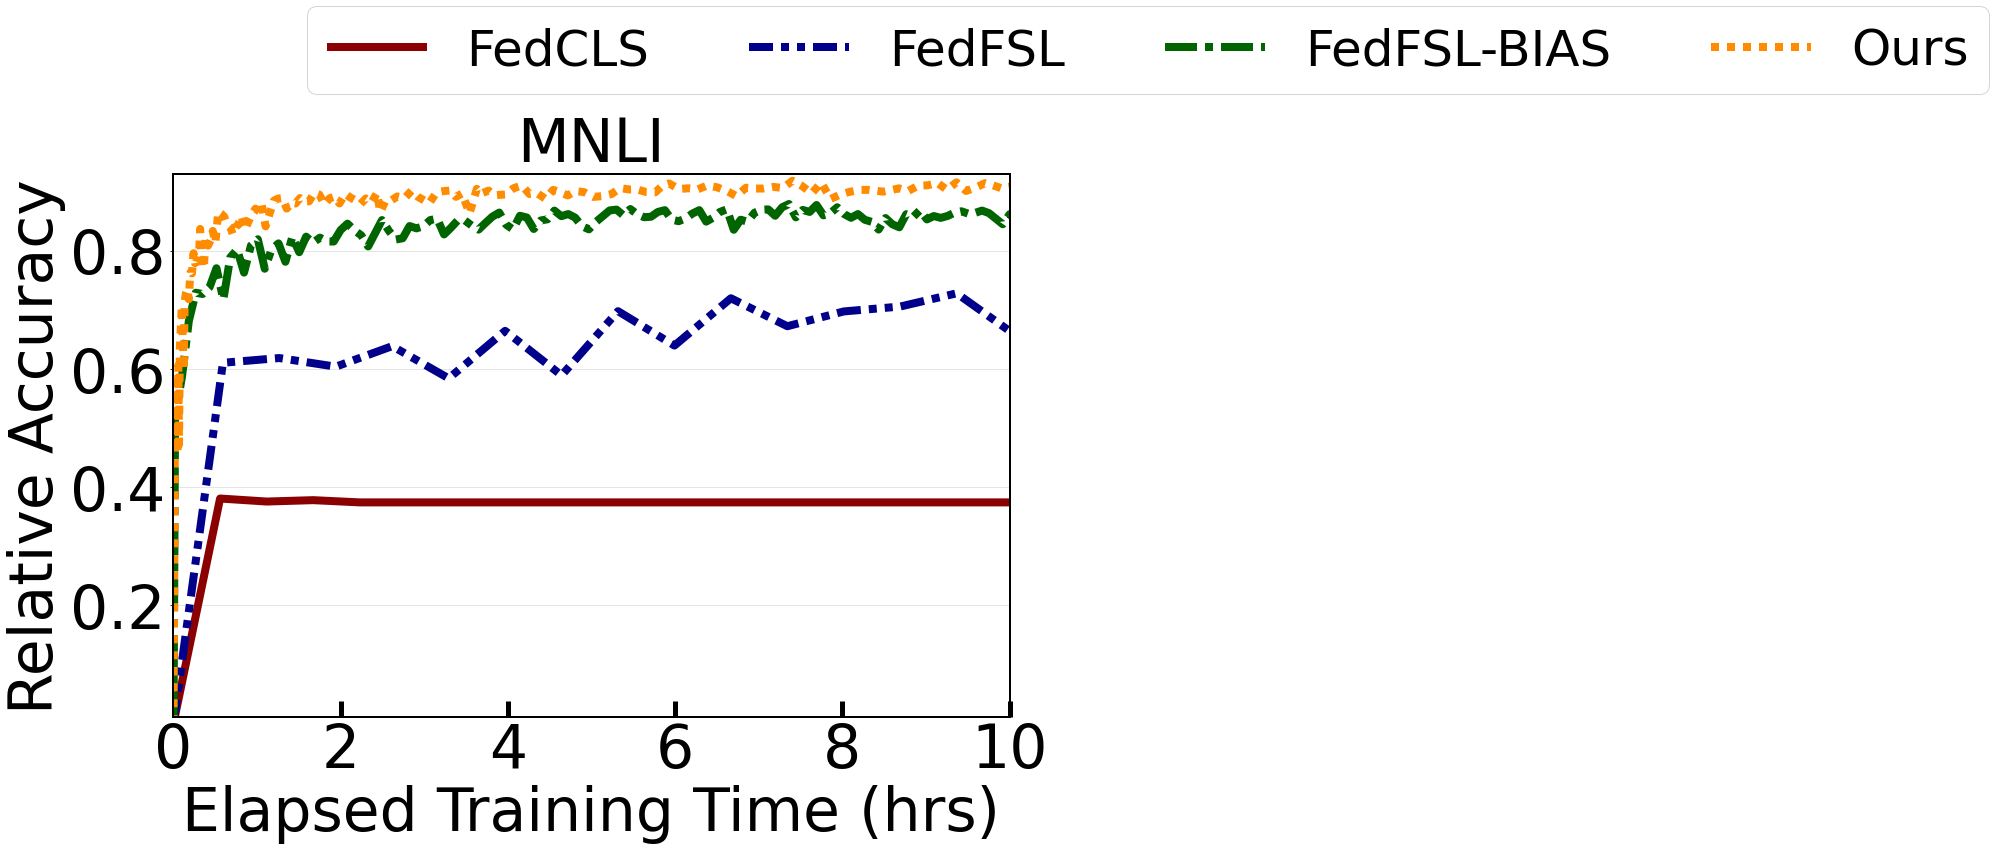

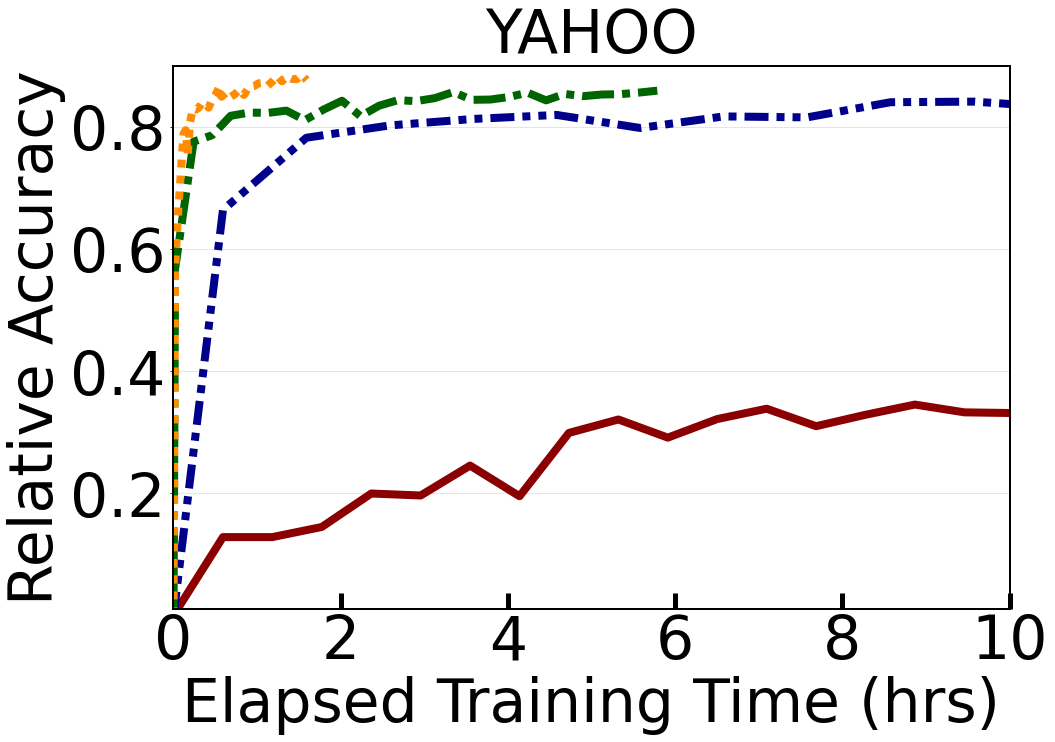

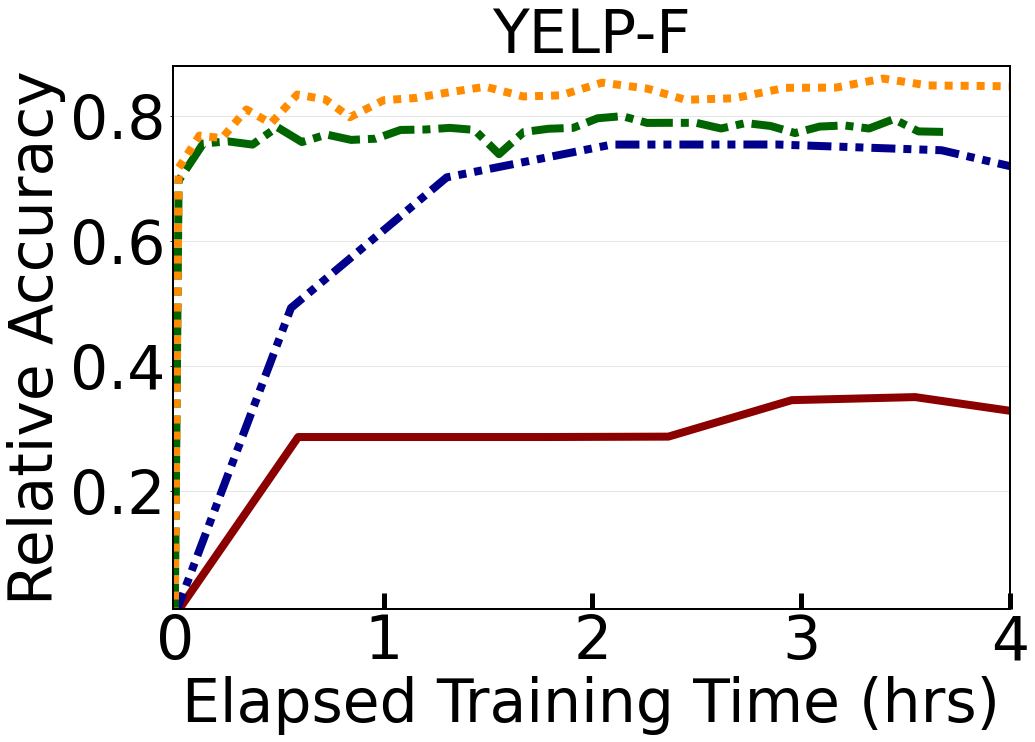

In [14]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
xlim = {"agnews": [-0.01,2], "mnli": [-0.01,10], "yahoo": [-0.01,10], "yelp-full": [-0.01,4]}
ylim = {"agnews": [0.01,1], "mnli": [0.01,0.93], "yahoo": [0.01,0.9], "yelp-full": [0.01,0.88]}
axis_gap = {"agnews": [0.2,1], "mnli": [0.2,2], "yahoo": [0.2,2], "yelp-full": [0.2,1]}

start_point = {"agnews": [0,0], "mnli": [0,0], "yahoo": [0,0], "yelp-full": [0,0]}
dataset_title = ["AGNEWS", "MNLI", "YAHOO", "YELP-F"]
d=0
for dataset in datasets:

    log_root_path = os.path.join(root_path,f"{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}")
    
    fig = plt.figure(figsize=(15,10))
    plt.title(dataset_title[d],fontsize=ft)
    d = d+1
    # 设置刻度字体大小
    plt.xticks(fontsize=ft)
    plt.yticks(fontsize=ft)
    plt.xlabel("Elapsed Training Time (hrs)", fontsize=ft)
    plt.ylabel("Relative Accuracy", fontsize=ft)
    plt.grid(color = 'k', linestyle = (0, (1, 1)), axis="y", linewidth = 0.5, alpha=0.4)
    border()

    x_major_locator=MultipleLocator(axis_gap[dataset][1])
    y_major_locator=MultipleLocator(axis_gap[dataset][0])
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)

    plt.xlim(xlim[dataset][0],xlim[dataset][1])
    plt.ylim(ylim[dataset][0],ylim[dataset][1])
    
    filenames = filenames_list[dataset]

    for filename in filenames:

        log_path = os.path.join(log_root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        comm_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0
        comm_runtime_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                train_samples = list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]
                infer_samples = list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]

                if filenames.index(filename) <= 1:
                    # TX2: train, 1s/sample, infer, 0.5s/sample
                    train_time = np.max(train_samples) * train_latency_list["tx2+full"] if len(train_samples) > 0 else 0
                    infer_time = np.max(infer_samples) * infer_latency_list["tx2+full"] if len(infer_samples) > 0 else 0
                else:
                    # TX2: train, 1s/sample, infer, 0.5s/sample
                    train_time = np.max(train_samples) * train_latency_list["tx2+bitfit"] if len(train_samples) > 0 else 0
                    if dataset == "mnli" and filenames.index(filename) == 3:
                        infer_time = np.max(infer_samples) * infer_latency_list["tx2+bitfit"] / 10 if len(infer_samples) > 0 else 0
                    else:
                        infer_time = np.max(infer_samples) * infer_latency_list["tx2+bitfit"] if len(infer_samples) > 0 else 0
                
                if filenames.index(filename) <= 1:
                    comm_time = communication_latency_list["full"]
                else:
                    comm_time = communication_latency_list["bitfit"]

                time_stamp = time_stamp + train_time + infer_time + comm_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp
                comm_runtime_stamp = comm_time + comm_runtime_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
                comm_runtime.append(comm_runtime_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc
        print(f"inference time ratio: {infer_runtime[-1]/runtime[-1]}")
        # print(infer_runtime[-1]*3+train_runtime[-1]*3+comm_runtime[-1]*1)
        print(f"inference energy ratio: {infer_runtime[-1]*3/(infer_runtime[-1]*3+train_runtime[-1]*3+comm_runtime[-1]*1)}")
        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        acc_list[dataset].append(this_max_acc)

        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        
        file_idx = filenames.index(filename)
        plot_x = np.array([start_point[dataset][0]] + runtime[:len(y_mean)]) / 3600
        plot_y = np.array([start_point[dataset][1]] + y_mean)/full_set_acc[dataset]
        plt.plot(plot_x, plot_y, label = type[file_idx], linewidth = lw, color = color[file_idx], linestyle = linestyle[file_idx])
    if dataset == "mnli":
        plt.legend(fontsize=50,ncol = 4,frameon=True, loc = 'lower right', bbox_to_anchor=(2.2, 1.1))
    fig.savefig(os.path.join(output_fig_path, f"final-{dataset}-roberta-large-time2accuracy.pdf"), borderpad=0.1, bbox_inches='tight')

In [11]:
acc_list

{'agnews': [], 'mnli': [], 'yahoo': [], 'yelp-full': []}